# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poughkeepsie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=poughkeepsie
Processing Record 2 of Set 1 | tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tidore
City not found. Skipping...
Processing Record 3 of Set 1 | turan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=turan
Processing Record 4 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bredasdorp
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mataura
Processing Record 6 of Set 1 | pauini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pauini
Proc

Processing Record 1 of Set 2 | sao sebastiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sao%20sebastiao
Processing Record 2 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint%20george
Processing Record 3 of Set 2 | am timan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=am%20timan
Processing Record 4 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khatanga
Processing Record 5 of Set 2 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lebu
Processing Record 6 of Set 2 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tasiilaq
Processing Record 7 of Set 2 | thompson
http://api.openweathermap.org/da

Processing Record 4 of Set 3 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aklavik
Processing Record 5 of Set 3 | mastung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mastung
Processing Record 6 of Set 3 | bhanpuri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bhanpuri
Processing Record 7 of Set 3 | ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ipixuna
Processing Record 8 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaini
Processing Record 9 of Set 3 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saldanha
Processing Record 10 of Set 3 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 8 of Set 4 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cidreira
Processing Record 9 of Set 4 | bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bereda
Processing Record 10 of Set 4 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nome
Processing Record 11 of Set 4 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=northam
Processing Record 12 of Set 4 | polovinnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=polovinnoye
Processing Record 13 of Set 4 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ngunguru
Processing Record 14 of Set 4 | port elizabeth
http://api.openweathermap.org/data/2.5/weathe

Processing Record 11 of Set 5 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nantucket
Processing Record 12 of Set 5 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bengkulu
City not found. Skipping...
Processing Record 13 of Set 5 | bystryy istok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bystryy%20istok
Processing Record 14 of Set 5 | ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ilo
Processing Record 15 of Set 5 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=east%20london
Processing Record 16 of Set 5 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nikolskoye
Processing Record 17 of Set 5 | marcon

Processing Record 13 of Set 6 | bhadrachalam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bhadrachalam
Processing Record 14 of Set 6 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=avarua
Processing Record 15 of Set 6 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=umzimvubu
City not found. Skipping...
Processing Record 16 of Set 6 | axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=axim
Processing Record 17 of Set 6 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ust-kuyga
Processing Record 18 of Set 6 | volchanets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=volchanets
Processing Record 19 of Set 6 | mataram
http://api

City not found. Skipping...
Processing Record 16 of Set 7 | riva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=riva
Processing Record 17 of Set 7 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port-gentil
Processing Record 18 of Set 7 | oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=oistins
Processing Record 19 of Set 7 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bambous%20virieux
Processing Record 20 of Set 7 | dingzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dingzhou
Processing Record 21 of Set 7 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sangar
Processing Record 22 of Set 7 | iguape
http://

Processing Record 19 of Set 8 | krutikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=krutikha
Processing Record 20 of Set 8 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bosaso
Processing Record 21 of Set 8 | ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ust-kamchatsk
City not found. Skipping...
Processing Record 22 of Set 8 | timra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=timra
Processing Record 23 of Set 8 | chaozhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chaozhou
Processing Record 24 of Set 8 | allada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=allada
Processing Record 25 of Set 8 | pisco
http://api.openweath

Processing Record 22 of Set 9 | tecpan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tecpan
Processing Record 23 of Set 9 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mount%20gambier
Processing Record 24 of Set 9 | todos santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=todos%20santos
Processing Record 25 of Set 9 | alamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=alamo
Processing Record 26 of Set 9 | kansanshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kansanshi
Processing Record 27 of Set 9 | boralday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=boralday
Processing Record 28 of Set 9 | quesnel
http://api.openweathermap.or

Processing Record 25 of Set 10 | houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=houston
Processing Record 26 of Set 10 | glens falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=glens%20falls
Processing Record 27 of Set 10 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=namatanai
Processing Record 28 of Set 10 | karamea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=karamea
City not found. Skipping...
Processing Record 29 of Set 10 | moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=moerai
Processing Record 30 of Set 10 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=amahai
Processing Record 31 of Set 10 | sabha
http://api.

Processing Record 27 of Set 11 | umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=umm%20durman
City not found. Skipping...
Processing Record 28 of Set 11 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=srednekolymsk
Processing Record 29 of Set 11 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yanam
Processing Record 30 of Set 11 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=buraydah
Processing Record 31 of Set 11 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ixtapa
Processing Record 32 of Set 11 | mackenzie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mackenzie
Processing Record 33 of Set 11 | ubinsko

Processing Record 30 of Set 12 | svetlaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=svetlaya
Processing Record 31 of Set 12 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-augustin
Processing Record 32 of Set 12 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=maniitsoq
Processing Record 33 of Set 12 | qurayyat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=qurayyat
City not found. Skipping...
Processing Record 34 of Set 12 | ialibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ialibu
Processing Record 35 of Set 12 | miram shah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=miram%20shah
Processing Record 36 of Set 12 |

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [17]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,longyearbyen,75,SJ,1483588200,73,78.22,15.64,26.6,19.46
1,asau,0,RO,1483592400,59,46.43,26.40,37.4,14.99
2,hartselle,1,US,1483592280,86,34.44,-86.94,32.0,3.36
3,komsomolskiy,40,UZ,1483592400,80,40.43,71.72,37.4,3.36
4,kapaa,90,US,1483592160,88,22.08,-159.32,71.6,17.22


## Latitude vs Temperature Plot

In [2]:
# Import csv file into dataframe
df = pd.read_csv("cities.csv")

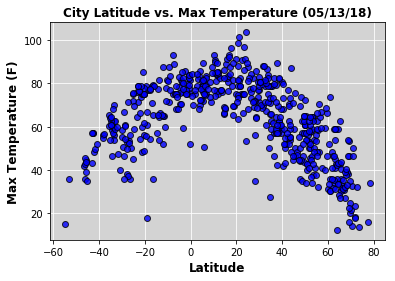

In [32]:
# Build scatter plot for latitude vs temperature
ax = plt.axes(facecolor='lightgray')
plt.grid(color='w', linestyle='solid')
plt.rcParams['axes.axisbelow'] = True

plt.scatter(df["Lat"], 
            df["Max Temp"],
            color = 'blue',
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"), fontweight = "bold", fontsize = 12)
plt.ylabel("Max Temperature (F)", fontweight = "bold", fontsize = 12)
plt.xlabel("Latitude", fontweight = "bold", fontsize = 12)

# Save the figure
plt.savefig("temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

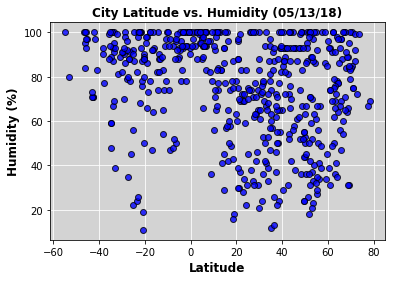

In [33]:
# Build the scatter plots for each city types
ax = plt.axes(facecolor='lightgray')
plt.grid(color='w', linestyle='solid')
plt.rcParams['axes.axisbelow'] = True


plt.scatter(df.Lat, 
            df.Humidity,
            color = 'blue',
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), fontweight = "bold", fontsize = 12)
plt.ylabel("Humidity (%)", fontweight = "bold", fontsize = 12)
plt.xlabel("Latitude", fontweight = "bold", fontsize = 12)
plt.grid(True)

# Save the figure
plt.savefig("humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

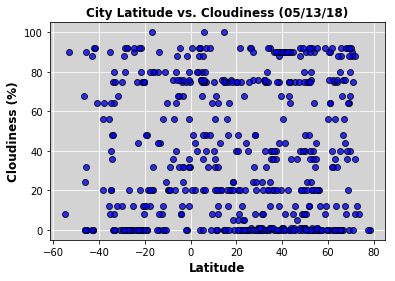

In [34]:
# Build the scatter plots for each city types
ax = plt.axes(facecolor='lightgray')
plt.grid(color='w', linestyle='solid')
plt.rcParams['axes.axisbelow'] = True

plt.scatter(df.Lat, 
            df.Cloudiness,
            color = 'blue',
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), fontweight = "bold", fontsize = 12)
plt.ylabel("Cloudiness (%)", fontweight = "bold", fontsize = 12)
plt.xlabel("Latitude", fontweight = "bold", fontsize = 12)
plt.grid(True)

# Save the figure
plt.savefig("cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

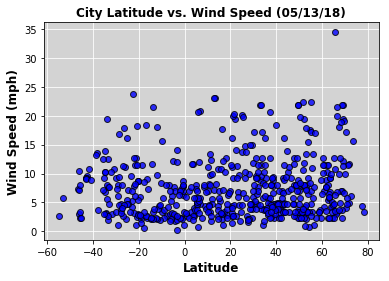

In [35]:
# Build the scatter plots for each city types
ax = plt.axes(facecolor='lightgray')
plt.grid(color='w', linestyle='solid')
plt.rcParams['axes.axisbelow'] = True

plt.scatter(df.Lat, 
            df["Wind Speed"],
            color = 'blue',
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontweight = "bold", fontsize = 12)
plt.ylabel("Wind Speed (mph)", fontweight = "bold", fontsize = 12)
plt.xlabel("Latitude", fontweight = "bold", fontsize = 12)
plt.grid(True)

# Save the figure
plt.savefig("windspeed.png")

# Show plot
plt.show()